<a href="https://colab.research.google.com/github/bigmanrook/bigmanrook/blob/main/LitterDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing and Importing all required libraries
from ast import Pass
from asyncio.proactor_events import _ProactorBaseWritePipeTransport
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D
!pip install pysimplegui
import PySimpleGUI as sg
import cv2 as cv
!pip install mitdeeplearning 
import mitdeeplearning as mdl
import zipfile
import os
import pandas as pd
!pip install sklearn
import sklearn as sk
import urllib.request

In [ ]:
#IMPORTING DATASET FROM GITHUB


In [ ]:
#IMPORTING DATASET FROM GITHUB
!wget --no-check-certificate \
    "https://github.com/UAVVaste/UAVVaste/archive/refs/heads/main.zip" \
    -O "/tmp/UAVVaste.zip"

#Saving Dataset in colab 
zip_ref = zipfile.ZipFile('/tmp/UAVVaste.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import json
import zipfile

!wget --no-check-certificate \
    "https://github.com/pedropro/TACO/archive/refs/heads/master.zip" \
    -O "/tmp/TACO.zip"

#Saving Dataset in colab 
zip_ref = zipfile.ZipFile('/tmp/TACO.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

#Read Json files 
with open("/tmp/TACO-master/data/annotations.json") as f:
  data = json.load(f)
  images_df = pd.json_normalize(data['images'])
  annotations_df = pd.json_normalize(data['annotations'])
  images_df.to_csv("/tmp/TACO-master/data/images.csv")
  annotations_df.to_csv("/tmp/TACO-master/data/annotations.csv")


 # print(images_df.shape)
  print(annotations_df.head)



In [ ]:
import os
import pandas as pd
import json
from pandas import json_normalize
import csv
from PIL import Image
import urllib.request


def get_Image(image_url, crop_box, filename):
# get an image from the internet using url and save as temp file
  urllib.request.urlretrieve(image_url, "gfg.png")
# read image and show it
  img = Image.open("gfg.png")

# Cropped image of above dimension
# (It will not change original image)
  im1 = img.crop(crop_box)
  im1 = im1.resize((64,64))
# Shows the image in image viewer
  im1.save(filename)


# Opening JSON file
f = open('/tmp/TACO-master/data/annotations.json')
# returns JSON object as a dictionary
data = json.load(f)
# Closing file
f.close()

#check category folders
for cat in data['categories']:
  CHECK_DIR = os.path.isdir(cat['supercategory'])
  if not CHECK_DIR:
    os.makedirs(cat['supercategory'])

header = ['id', 'category_id', 'width', 'height', 'area', 'flickr_url', 'supercategory', 'name', 'box_x', 'box_y', 'box_width', 'box_height', 'file_name']

# Opening output csv file
f = open('annotations.csv', 'w', newline = '')
# create the csv writer
writer = csv.DictWriter(f, fieldnames=header, quoting=csv.QUOTE_NONNUMERIC)
writer.writeheader()

# Iterating through the json list and write CSV
for a in data['annotations']:
#  image_info[]
  row = {}
  row['id'] = a['id']
  row['category_id'] = a['category_id']
  row['area'] = a['area']
  row['box_x'] = a['bbox'][0]
  row['box_y'] = a['bbox'][1]
  row['box_width'] = a['bbox'][2]
  row['box_height'] = a['bbox'][3]
  for i in data['images']:
    if i['id'] == a['image_id']:
      row['width'] = i['width']
      row['height'] = i['height']
      row['flickr_url'] = i['flickr_url']
  for c in data['categories']:
    if c['id'] == a['category_id']:
      row['supercategory'] = c['supercategory']
      row['name'] = c['name']
  row['file_name'] = row['supercategory'] + '/' + row['name'].replace(' ','_') + '_' + str(row['id']) + '.jpg'
#  print(row)
#  print(str(a_id) + ',' + str(a_cat_id) + ',' + str(i_width) + ',' + str(i_height) + ',' + str(a_area) + ',' + i_flickr_url + ',' + c_supercategory + ',' + c_name)
# write a row to the csv file
  writer.writerow(row)
  
  get_Image(row['flickr_url'], (row['box_x'], row['box_y'], row['box_x'] + row['box_width'], row['box_y'] + row['box_height']), row['file_name'])

# close the file
f.close()

# Use pandas.DataFrame.from_dict() to Convert JSON to DataFrame
#df2 = pd.DataFrame.from_dict(data, orient="columns")
#print(df2)



In [ ]:
#PRE-PROCESSING DATA

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_mldata  
#Change USERNAME by the username of the machine  
##Windows USER  
data = fetch_mldata('')  
print(data.data.shape)  
print(data.target.shape)  
from sklearn.model_selection import train_test_split  
A_train, A_test, B_train, B_test = train_test_split(data.data,data.target, test_size=0.2, random_state=45)  
B_train  = B_train.astype(int)  
B_test  = B_test.astype(int)  
batch_size =len(X_train)  
print(A_train.shape, B_train.shape,B_test.shape )  
## rescale  
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
# Train the Dataset  
X_train_scaled = scaler.fit_transform(A_train.astype(np.float65))  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import json
#Read Json files 
with open("/tmp/UAVVaste-main/annotations/annotations.json") as f:
  data = json.load(f)
  images_df = pd.json_normalize(data['images'])
  

  print(images_df.shape)
  print(images_df.head)



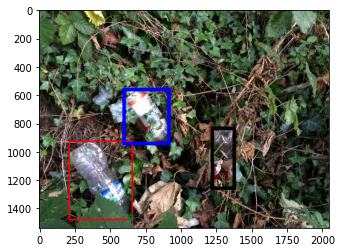

In [ ]:
#Cropping and displaying an image in the dataset 

import urllib.request 
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# get an image from the internet using url and save as temp file
urllib.request.urlretrieve('https://farm66.staticflickr.com/65535/47803331492_0e1085ca55_o.png', "gfg.png")
# read image and show it
img = Image.open("gfg.png")
# Cropped image of above dimension# (It will not change original image)
im1 = ImageDraw.Draw(img)
im1.rectangle([(209, 920), (454+209, 562+920)], outline='Red', width=10)

im1 = ImageDraw.Draw(img)
im1.rectangle([(1212.0, 822.0), ( 179.0 + 1212.0, 446.0 + 822.0)], outline='Black', width=25)

im1 = ImageDraw.Draw(img)
im1.rectangle([(634.0, 1442.0 ), (29.0 + 634.0 , 39.0 + 1442.0)], outline='Green', width=9)

im1 = ImageDraw.Draw(img)
im1.rectangle([(589.0, 548.0), (589.0 +  341.0, 548.0 + 405.0)], outline='Blue', width=25)
# Shows the image in image viewer
plt.imshow(img)
plt.show()

In [ ]:
#SPLIT DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#MODEL (From Tensorflow Zoo)
model = tf.keras.applications.MobileNetV2(weights='imagenet')


In [8]:
#MODEL (Custom coded)
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.set_random_seed(2019)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
  tf.keras.layers.Dropout(0.1,seed = 2019),
  tf.keras.layers.Dense(400,activation ="relu"),
  tf.keras.layers.Dropout(0.3,seed = 2019),
  tf.keras.layers.Dense(300,activation="relu"),
  tf.keras.layers.Dropout(0.4,seed = 2019),
  tf.keras.layers.Dense(200,activation ="relu"),
  tf.keras.layers.Dropout(0.2,seed = 2019),
  tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

model.summary()

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

bs=20         #Setting batch size
train_dir = "Picture/train/"   #Setting training directory
validation_dir = "Picture/test/"   #Setting testing directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
  rotation_range=30,  # rotation
  horizontal_flip=True,  # horizontal flip
  width_shift_range=0.2,  # horizontal shift
  zoom_range=0.2  # zoom
  )

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir, batch_size=bs, class_mode='categorical', target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir, batch_size=bs, class_mode='categorical', target_size=(180,180))

history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=150 // bs, epochs=10, validation_steps=50 // bs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

FileNotFoundError: ignored